In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

### Input

In [2]:
import pickle

# with open('df.pickle', 'wb') as handle:
#     pickle.dump(df_processed, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('df_processed.pickle', 'rb') as handle:
    df = pickle.load(handle)

df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_encoded
0,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1,1
1,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0,1
2,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9,1
3,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8,1
4,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5,1


### Train test split

In [3]:
# Traditional split
x = df.drop(['Life expectancy'], axis=1)
y = df['Life expectancy']
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.33, random_state=42)

In [4]:
# # In case the target variable is categorical
# sk_fold = StratifiedKFold(n_splits=2, shuffle=True)
# sk_fold.get_n_splits(x, y)

# # In case the target is continuos
# k_fold = KFold(n_splits=2, shuffle=True)
# k_fold.get_n_splits(x, y)

# # Enumerate splits
# for train, test in k_fold.split(x, y):
#     df.loc[train,:].shape, df.loc[test,:].shape

### Linear Regression

https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/
<br>
Base model had an accuracy of 67 r2 value
<br>
<br>
<b> Assumptions of linear model </b>
<li> Normality: For any fixed value of X, Y is normally distributed</li>
<li> Independence/variable interaction: Observations are independent of each other. </li>
<li> Homoscedasticity: The variance of residual is the same for any value of X. </li>
<li> <s>Linearity: The relationship between X and the mean of Y is linear </s></li>
<br>    
FINE TUNNING:
<li> <s> Remove missing values or treat it </s> </li>
<li> Remove outliers </li>
<li> Apply box-cox transformation </li>
<li> Check for homoscedacity </li>
<li> Check for multicolinearity </li>

In [10]:
# Stats model
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

# Sklearn
lr = LinearRegression()
lr.fit(x, y)

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     532.4
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:56:58   Log-Likelihood:                -4741.5
No. Observations:                1712   AIC:                             9517.
Df Residuals:                    1695   BIC:                             9610.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

LinearRegression()

In [15]:
# fitted_values = lr.predict(x)
# residuals = y - fitted_valuesa
est2.fittedvalues
est2.resid

646     0.726098
507     2.477518
2335   -1.616499
46      1.355716
1423   -3.044853
          ...   
1824    5.283008
1232    6.953852
1273    2.679986
1448   -4.838011
982     0.737913
Length: 1712, dtype: float64

REQUIRED CALCULATION

In [58]:
# Fitted values
model_fitted_y  = est2.fittedvalues

# Residuals
model_residuals  = est2.resid

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# normalized residuals
model_norm_residuals = est2.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# leverage, from statsmodels internals
model_leverage = est2.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = est2.get_influence().cooks_distance[0]

RESIDUAL PLOT

Text(0, 0.5, 'Fitted values')

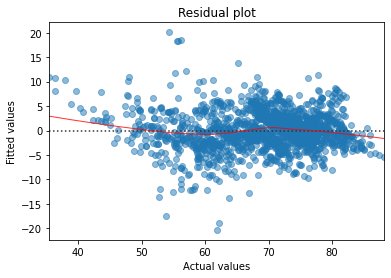

In [52]:
# Plot
fig, ax = plt.subplots(1)
sns.residplot(model_fitted_y, 
              y_train,
              lowess=True,
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
ax.set_title('Residual plot')
ax.set_xlabel('Actual values')
ax.set_ylabel('Fitted values')

QQ PLOT

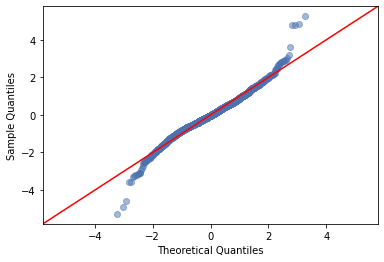

In [57]:
# Plot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

SCALE - LOCATION PLOT

<AxesSubplot:>

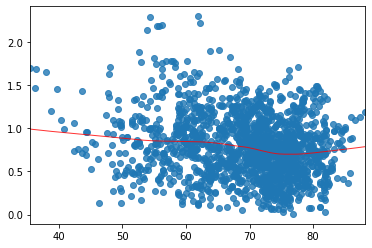

In [67]:
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=True, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

LEVERAGE PLOT

<AxesSubplot:>

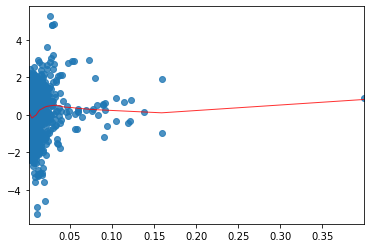

In [66]:
sns.regplot(model_leverage, stan, 
            scatter=True, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})